**Name: Anil Bhusal  <br>
Csc 447  <br>
HomeWork 2  <br>
Prof. Erik K. Grimmelmann<br>
26 September 2022**  <br>

### Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from mpl_toolkits import mplot3d
from sklearn import datasets
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier

### Import the Iris data set

In [2]:
iris = datasets.load_iris()
X = iris.data
Y = iris.target
x_min, x_max = X.min() - 0.5, X.max() + 1.5


### Get Iris classifications

In [3]:
IC = np.unique(Y)
IrisC = ('Setosa','Versicolor','Virginica')
pltC = ('red', 'blue', 'green')
pltCback = ('pink', 'lightblue','lightgreen')
pltM = ('o', 'x', '*')
for i in range(0,3):
    print (IC[i],pltM[i],IrisC[i],pltC[i],pltCback[i])
    


0 o Setosa red pink
1 x Versicolor blue lightblue
2 * Virginica green lightgreen


### Setup Iris feature lablels

In [4]:
IrisF=("sepal length (cm)", "sepal width (cm)", "petal length (cm)", "petal width (cm)")
for i in range(0,4):
    print(IrisF[i])
    
#setting for plots
Xzeros0 = (0. * X) + .2
Xzeros1 = (0. * X) 
Xzeros2 = (0. * X) - .2

sepal length (cm)
sepal width (cm)
petal length (cm)
petal width (cm)


### Function to choose the classes and features to be modeled and return XX and YY arrays

In [5]:
"""
This function will take list of class and lsit of features. 
list of class can be size of two or three classes
list of features can be one to four features
Finally, this function will model the class and feature. And, return array of XX and YY arrays.
where, XX array will include the specified features from the original dataset.
       YY array will include the specified classes from the original dataset.
"""
def build_XX_YY_from_class_and_feature(classes: list, features: list):
    # choose the classes and features to be included in the model
    cdx = np.array(classes)             # this array contains the classes to be considered (can be 2-3 classes)
    fdx = np.array(features)           # this array contains the features to be considered (can be 1-4 features)

    nC = len(cdx)
    nF = len(fdx)


    print ('\nClasses')
    for i in range(nC):
        print (cdx[i],IrisC[cdx[i]])

    print ('\nFeatures')
    for i in range(nF):
        print (fdx[i],IrisF[fdx[i]])


    # build the XX and YY arrays
    # these arrays contain the samples in the classes specified in cdx and include the features specified in fdx

    i = 0
    numY = 0
    for i in range(len(Y)):
        for j in range(nC):
            if Y[i] == IC[cdx[j]]:
                numY += 1

    YY = np.zeros((numY))
    XX = np.zeros((numY,nF))
    if (len(fdx) == 1):
        XXzeros0 = (0. * XX) + .2
        XXzeros1 = (0. * XX) 
        XXzeros2 = (0. * XX) - .2

    j = 0
    for i in range(len(Y)):
        for k in range(nC):
            if Y[i] == IC[cdx[k]]:        
                YY[j] = IC[cdx[k]]
                for m in range(nF):
                    XX[j,m] = X[i,fdx[m]] 
                j += 1
    return XX,YY;

### Fit the model

In [6]:
"""
This function will train the model  Stochastic Gradient Descent classifier and print the accuracy  from the 
model data set. After fitting the data, it will return the object of the SGDClassifier.  
"""
def fit_model(XX, YY, tol=1e-4, max_iter=1000, random_state=0, epsilon=0.1, loss='hinge'):
    clf = SGDClassifier(tol=tol, max_iter=max_iter, random_state=random_state, epsilon=epsilon, loss=loss)
    clf.fit(XX,YY)
    print('\nAccuracy of SGDClassifier model is',clf.score(XX,YY)*100,'%')
    return clf;

### Plot data for this pair of features and classes

In [7]:
"""
Function to draw the graph of each combinations except 4D graphs. 
"""
def plot_feature_classes(XX, YY, cdx: list, fdx: list, clf):
    plt.close('all')
    if (len(fdx) == 1):
        XXzeros0 = (0. * XX) + .2
        XXzeros1 = (0. * XX) 
        XXzeros2 = (0. * XX) - .2

    if (len(fdx) == 1):

        fig, ax = plt.subplots(figsize=(8,2))

        xx = np.arange(x_min,x_max, 0.05).reshape((-1,1))
        yy = clf.predict(xx)

        xxzeros1 = (0. * xx) + .5

    # plot the decision regions

        if (IC[0] in cdx): ax.scatter(xx[yy == IC[0],0], xxzeros1[yy == IC[0]],
                        color=pltC[0], marker='.')
        if (IC[1] in cdx): ax.scatter(xx[yy == IC[1],0], xxzeros1[yy == IC[1]],
                        color=pltC[1], marker='.')
        if (IC[2] in cdx): ax.scatter(xx[yy == IC[2],0], xxzeros1[yy == IC[2]],
                        color=pltC[2], marker='.')   

    # plot the data

        if (IC[0] in cdx): ax.scatter(XX[YY == IC[0],0], XXzeros0[YY == IC[0]],
                        color=pltC[0], marker=pltM[0], label=IrisC[0])
        if (IC[1] in cdx): ax.scatter(XX[YY == IC[1],0], XXzeros1[YY == IC[1]],
                        color=pltC[1], marker=pltM[1], label=IrisC[1])
        if (IC[2] in cdx): ax.scatter(XX[YY == IC[2],0], XXzeros2[YY == IC[2]],
                        color=pltC[2], marker=pltM[2], label=IrisC[2])    

        ax.set_xlim(x_min,x_max)
        ax.set_ylim(-1.,+2.)
        ax.set_xlabel(IrisF[fdx[0]])
        ax.axes.yaxis.set_visible(False)
        ax.legend(loc='upper right', fontsize='x-small')
        plt.show()    

    elif (len(fdx) == 2):

        fig, ax = plt.subplots(figsize=(8,8))

        xx1, xx2 = np.meshgrid(np.arange(x_min,x_max,0.05), np.arange(x_min,x_max,0.05))                     
        yy = clf.predict(np.c_[xx1.ravel(), xx2.ravel()])
        yy = yy.reshape(xx1.shape)

    # plot the decision regions    

        if (IC[0] in cdx): ax.scatter(xx1[yy == IC[0]], xx2[yy == IC[0]],
                        color=pltCback[0], marker='.')
        if (IC[1] in cdx): ax.scatter(xx1[yy == IC[1]], xx2[yy == IC[1]], 
                        color=pltCback[1], marker='.')
        if (IC[2] in cdx): ax.scatter(xx1[yy == IC[2]], xx2[yy == IC[2]],
                        color=pltCback[2], marker='.')    

    # plot the data

        if (IC[0] in cdx): ax.scatter(XX[YY == IC[0],0], XX[YY == IC[0],1],
                        color=pltC[0], marker=pltM[0], label=IrisC[0])
        if (IC[1] in cdx): ax.scatter(XX[YY == IC[1],0], XX[YY == IC[1],1], 
                        color=pltC[1], marker=pltM[1], label=IrisC[1])
        if (IC[2] in cdx): ax.scatter(XX[YY == IC[2],0], XX[YY == IC[2],1],
                        color=pltC[2], marker=pltM[2], label=IrisC[2])

        ax.set_xlim(x_min,x_max)
        ax.set_ylim(x_min,x_max)
        ax.set_xlabel(IrisF[fdx[0]])
        ax.set_ylabel(IrisF[fdx[1]])
        ax.legend(loc='upper right', fontsize='small')
        plt.show()    

    elif (len(fdx) == 3):

        ixm = fdx[0]
        iym = fdx[1]
        izm = fdx[2]
        xF = IrisF[ixm]
        yF = IrisF[iym]
        zF = IrisF[izm]

        fig = plt.figure(figsize=(6,6))    
        ax = plt.axes(projection='3d')   

    # plot the data points

        if (IC[0] in cdx): ax.scatter3D(X[Y == IC[0],ixm], X[Y == IC[0],iym], X[Y == IC[0],izm], 
            color=pltC[0], marker=pltM[0], label=IrisC[0])
        if (IC[1] in cdx): ax.scatter3D(X[Y == IC[1],ixm], X[Y == IC[1],iym], X[Y == IC[1],izm], 
            color=pltC[1], marker=pltM[1], label=IrisC[1])
        if (IC[2] in cdx): ax.scatter3D(X[Y == IC[2],ixm], X[Y == IC[2],iym], X[Y == IC[2],izm], 
            color=pltC[2], marker=pltM[2], label=IrisC[2])    

        ax.set_xlim(x_min,x_max)
        ax.set_ylim(x_min,x_max)
        ax.set_zlim(x_min,x_max)
        ax.set_xlabel(xF)
        ax.set_ylabel(yF)
        ax.set_zlabel(zF)            
        ax.legend(loc='upper right', fontsize='small')
        plt.show() 

    # if there are two classes, add the decision boundary and plot again

        A = clf.fit(XX,YY)
        Acl =  A.classes_
        if (len(Acl) == 2):  

            fig = plt.figure(figsize=(6,6))    
            ax = plt.axes(projection='3d')   

        # plot the data points

            if (IC[0] in cdx): ax.scatter3D(X[Y == IC[0],ixm], X[Y == IC[0],iym], X[Y == IC[0],izm], 
                color=pltC[0], marker=pltM[0], label=IrisC[0])
            if (IC[1] in cdx): ax.scatter3D(X[Y == IC[1],ixm], X[Y == IC[1],iym], X[Y == IC[1],izm], 
                color=pltC[1], marker=pltM[1], label=IrisC[1])
            if (IC[2] in cdx): ax.scatter3D(X[Y == IC[2],ixm], X[Y == IC[2],iym], X[Y == IC[2],izm], 
                color=pltC[2], marker=pltM[2], label=IrisC[2])    


            Ai = A.intercept_
            Acoef = A.coef_
            xgrid = np.arange(x_min,x_max,0.05)       
            nx = len(xgrid)
            for i in range(nx):
                for j in range(nx):
                    z = -(Acoef[0,0]*xgrid[i]+Acoef[0,1]*xgrid[j]+Ai[0])/Acoef[0,2]
                    if ((z>=x_min)&(z<=x_max)): ax.scatter3D(xgrid[i],xgrid[j],z,marker='.',color='lightgray')

            ax.set_xlim(x_min,x_max)
            ax.set_ylim(x_min,x_max)
            ax.set_zlim(x_min,x_max)
            ax.set_xlabel(xF)
            ax.set_ylabel(yF)
            ax.set_zlabel(zF)            
            ax.legend(loc='upper right', fontsize='small')
            plt.show()         


### Combination of classes

In [8]:
#list of all the combination of the classes
two_classes = [[0,1], [0,2], [1,2]]    # Choosing 2 classes
three_classes = [[0,1,2]]              # Choosing 3 classes

### Combination of features

In [9]:
#list of all the combination of the features
one_feature= [[0], [1], [2], [3]]                             # Choosing 1 features
two_feature= [[0,1], [0,2], [0,3],[1,2], [1,3], [2,3]]        # Choosing 2 features
three_feature= [[0,1,2], [0,1,3], [0,2,3], [1,2,3]]           # Choosing 3 features
four_feature = [[0,1,2,3]]                                    # Choosing 4 features

### Selecting 1 Feature and 2 classes

Case: 1
--------

Classes
0 Setosa
1 Versicolor

Features
0 sepal length (cm)

Accuracy of SGDClassifier model is 86.0 %


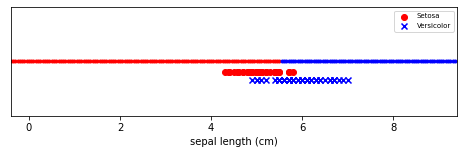

---------------------------------------------------------------------------------------------------- 

Case: 2
--------

Classes
0 Setosa
1 Versicolor

Features
1 sepal width (cm)

Accuracy of SGDClassifier model is 83.0 %


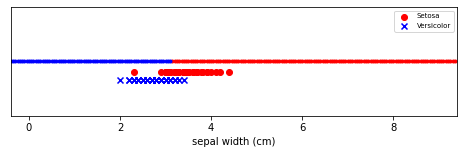

---------------------------------------------------------------------------------------------------- 

Case: 3
--------

Classes
0 Setosa
1 Versicolor

Features
2 petal length (cm)

Accuracy of SGDClassifier model is 100.0 %


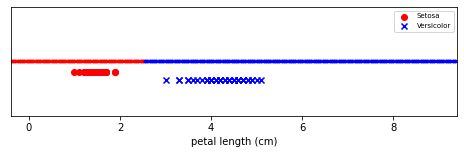

---------------------------------------------------------------------------------------------------- 

Case: 4
--------

Classes
0 Setosa
1 Versicolor

Features
3 petal width (cm)

Accuracy of SGDClassifier model is 100.0 %


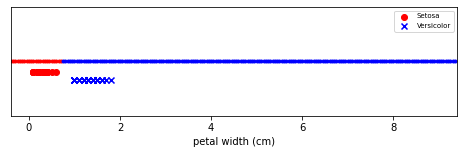

---------------------------------------------------------------------------------------------------- 

Case: 5
--------

Classes
0 Setosa
2 Virginica

Features
0 sepal length (cm)

Accuracy of SGDClassifier model is 95.0 %


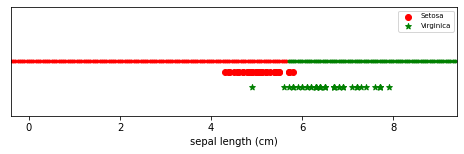

---------------------------------------------------------------------------------------------------- 

Case: 6
--------

Classes
0 Setosa
2 Virginica

Features
1 sepal width (cm)

Accuracy of SGDClassifier model is 61.0 %


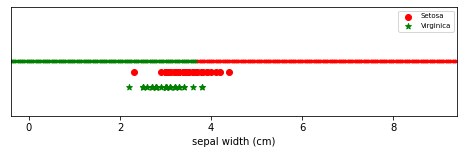

---------------------------------------------------------------------------------------------------- 

Case: 7
--------

Classes
0 Setosa
2 Virginica

Features
2 petal length (cm)

Accuracy of SGDClassifier model is 100.0 %


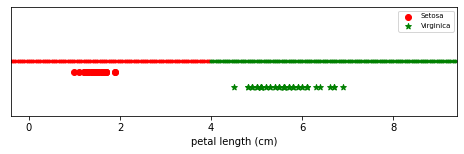

---------------------------------------------------------------------------------------------------- 

Case: 8
--------

Classes
0 Setosa
2 Virginica

Features
3 petal width (cm)

Accuracy of SGDClassifier model is 100.0 %


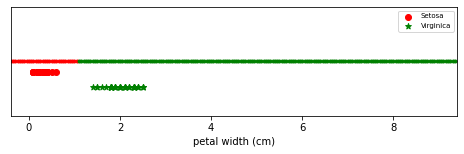

---------------------------------------------------------------------------------------------------- 

Case: 9
--------

Classes
1 Versicolor
2 Virginica

Features
0 sepal length (cm)

Accuracy of SGDClassifier model is 56.99999999999999 %


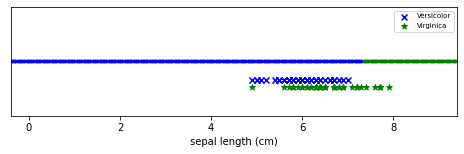

---------------------------------------------------------------------------------------------------- 

Case: 10
--------

Classes
1 Versicolor
2 Virginica

Features
1 sepal width (cm)

Accuracy of SGDClassifier model is 60.0 %


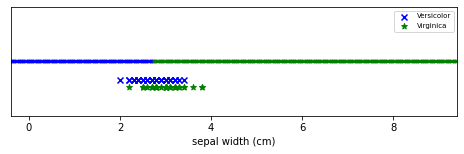

---------------------------------------------------------------------------------------------------- 

Case: 11
--------

Classes
1 Versicolor
2 Virginica

Features
2 petal length (cm)

Accuracy of SGDClassifier model is 93.0 %


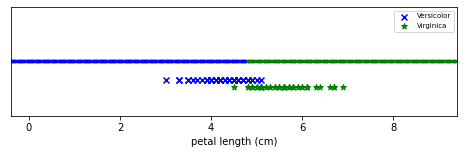

---------------------------------------------------------------------------------------------------- 

Case: 12
--------

Classes
1 Versicolor
2 Virginica

Features
3 petal width (cm)

Accuracy of SGDClassifier model is 94.0 %


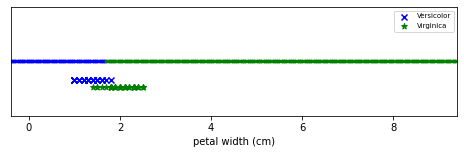

---------------------------------------------------------------------------------------------------- 



In [10]:
total_cases = 1
for classes in two_classes:
    for feature in one_feature:
        print('Case:', total_cases)
        print('--------')
        XX,YY = build_XX_YY_from_class_and_feature(classes,feature)
        clf = fit_model(XX, YY, tol=1e-4, random_state=0, epsilon=0.01, loss='log')
        plot_feature_classes(XX, YY, cdx=classes, fdx=feature, clf=clf)
        total_cases +=1
        print('-'*100, '\n')
        

### Selecting 1 Feature and 3 classes

Case: 13
--------

Classes
0 Setosa
1 Versicolor
2 Virginica

Features
0 sepal length (cm)

Accuracy of SGDClassifier model is 67.33333333333333 %


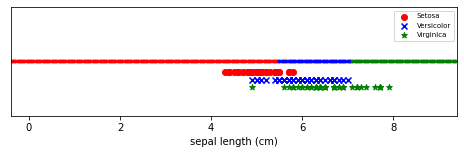

---------------------------------------------------------------------------------------------------- 

Case: 14
--------

Classes
0 Setosa
1 Versicolor
2 Virginica

Features
1 sepal width (cm)

Accuracy of SGDClassifier model is 54.0 %


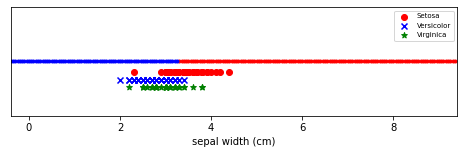

---------------------------------------------------------------------------------------------------- 

Case: 15
--------

Classes
0 Setosa
1 Versicolor
2 Virginica

Features
2 petal length (cm)

Accuracy of SGDClassifier model is 70.66666666666667 %


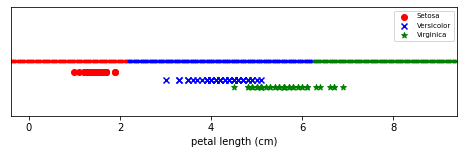

---------------------------------------------------------------------------------------------------- 

Case: 16
--------

Classes
0 Setosa
1 Versicolor
2 Virginica

Features
3 petal width (cm)

Accuracy of SGDClassifier model is 94.66666666666667 %


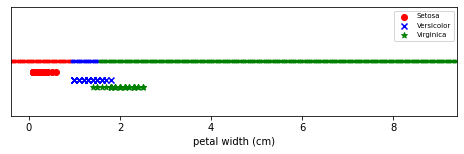

---------------------------------------------------------------------------------------------------- 



In [11]:
for classes in three_classes:
    for feature in one_feature:
        print('Case:', total_cases)
        print('--------')
        XX,YY = build_XX_YY_from_class_and_feature(classes,feature)
        clf = fit_model(XX, YY, tol=1e-4, random_state=0, epsilon=0.01, loss='log')
        plot_feature_classes(XX, YY, cdx=classes, fdx=feature, clf=clf)
        total_cases +=1
        print('-'*100, '\n')

### Selecting 2 Features and 2 classes  

Case: 17
--------

Classes
0 Setosa
1 Versicolor

Features
0 sepal length (cm)
1 sepal width (cm)

Accuracy of SGDClassifier model is 99.0 %


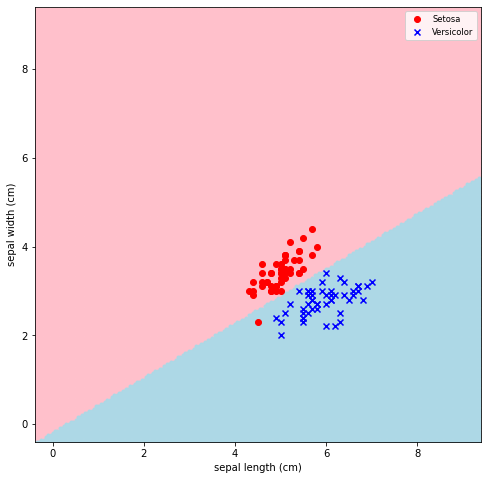

---------------------------------------------------------------------------------------------------- 

Case: 18
--------

Classes
0 Setosa
1 Versicolor

Features
0 sepal length (cm)
2 petal length (cm)

Accuracy of SGDClassifier model is 100.0 %


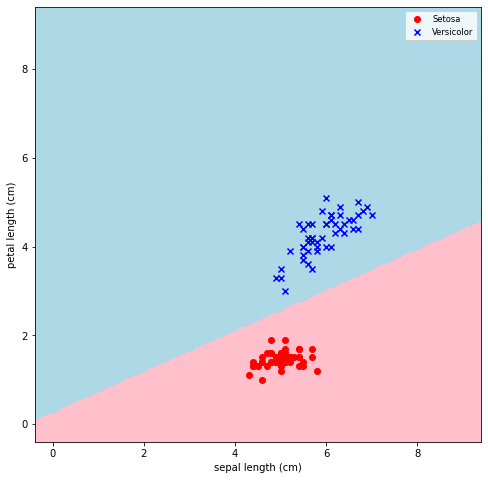

---------------------------------------------------------------------------------------------------- 

Case: 19
--------

Classes
0 Setosa
1 Versicolor

Features
0 sepal length (cm)
3 petal width (cm)

Accuracy of SGDClassifier model is 100.0 %


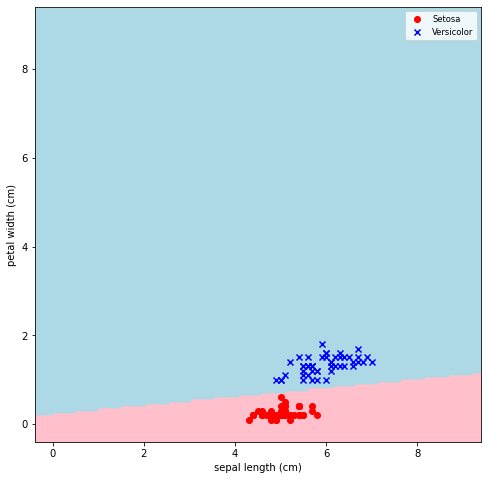

---------------------------------------------------------------------------------------------------- 

Case: 20
--------

Classes
0 Setosa
1 Versicolor

Features
1 sepal width (cm)
2 petal length (cm)

Accuracy of SGDClassifier model is 100.0 %


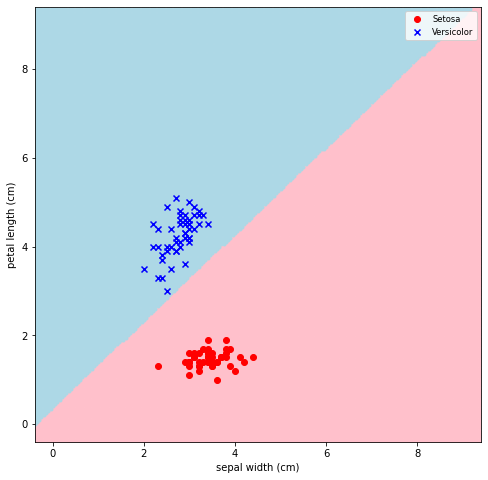

---------------------------------------------------------------------------------------------------- 

Case: 21
--------

Classes
0 Setosa
1 Versicolor

Features
1 sepal width (cm)
3 petal width (cm)

Accuracy of SGDClassifier model is 100.0 %


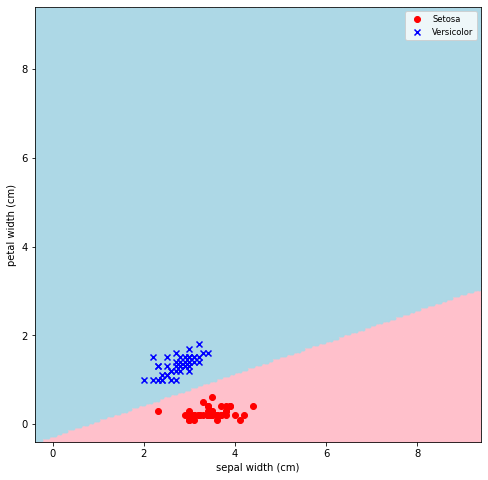

---------------------------------------------------------------------------------------------------- 

Case: 22
--------

Classes
0 Setosa
1 Versicolor

Features
2 petal length (cm)
3 petal width (cm)

Accuracy of SGDClassifier model is 100.0 %


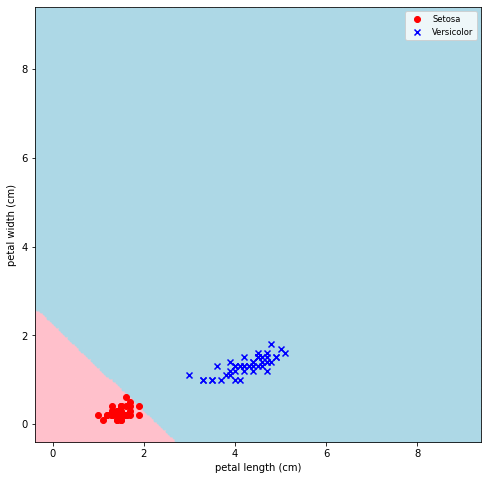

---------------------------------------------------------------------------------------------------- 

Case: 23
--------

Classes
0 Setosa
2 Virginica

Features
0 sepal length (cm)
1 sepal width (cm)

Accuracy of SGDClassifier model is 99.0 %


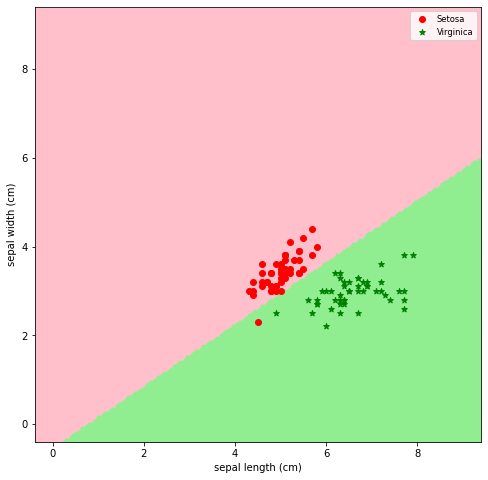

---------------------------------------------------------------------------------------------------- 

Case: 24
--------

Classes
0 Setosa
2 Virginica

Features
0 sepal length (cm)
2 petal length (cm)

Accuracy of SGDClassifier model is 100.0 %


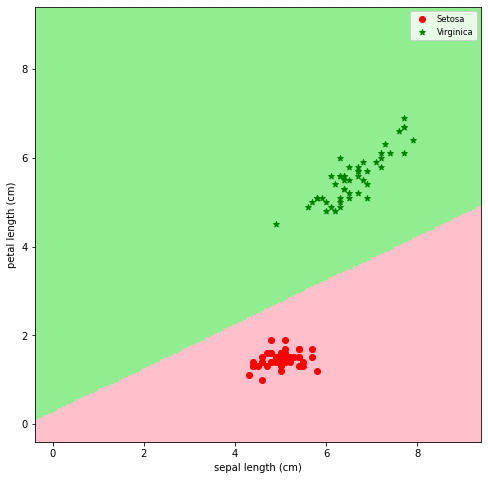

---------------------------------------------------------------------------------------------------- 

Case: 25
--------

Classes
0 Setosa
2 Virginica

Features
0 sepal length (cm)
3 petal width (cm)

Accuracy of SGDClassifier model is 100.0 %


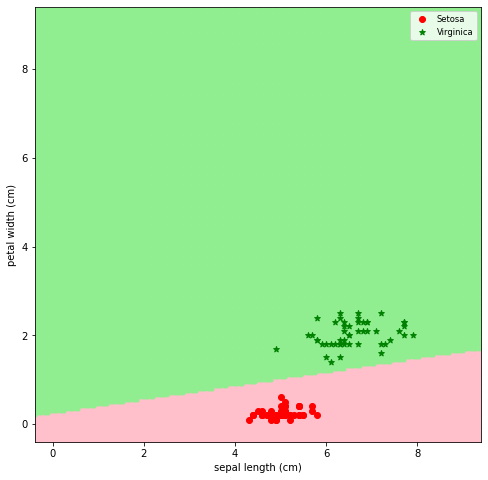

---------------------------------------------------------------------------------------------------- 

Case: 26
--------

Classes
0 Setosa
2 Virginica

Features
1 sepal width (cm)
2 petal length (cm)

Accuracy of SGDClassifier model is 100.0 %


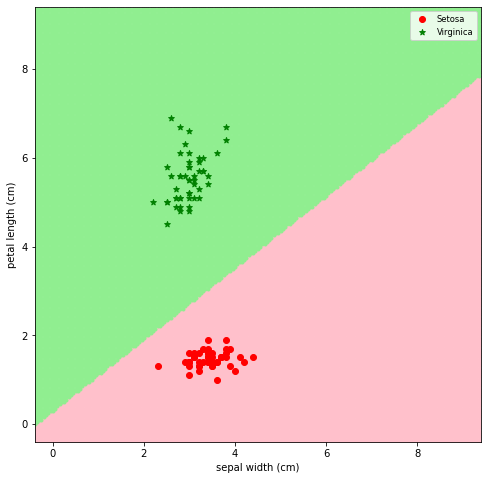

---------------------------------------------------------------------------------------------------- 

Case: 27
--------

Classes
0 Setosa
2 Virginica

Features
1 sepal width (cm)
3 petal width (cm)

Accuracy of SGDClassifier model is 100.0 %


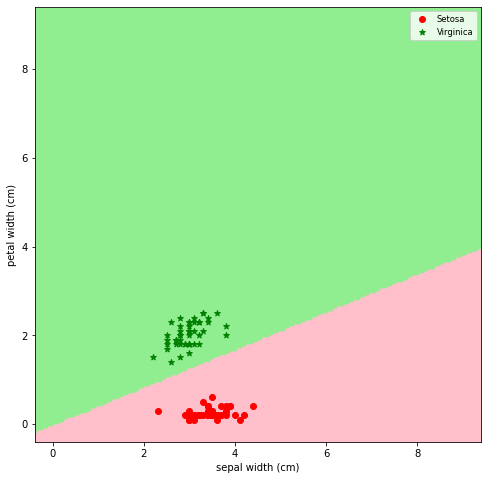

---------------------------------------------------------------------------------------------------- 

Case: 28
--------

Classes
0 Setosa
2 Virginica

Features
2 petal length (cm)
3 petal width (cm)

Accuracy of SGDClassifier model is 100.0 %


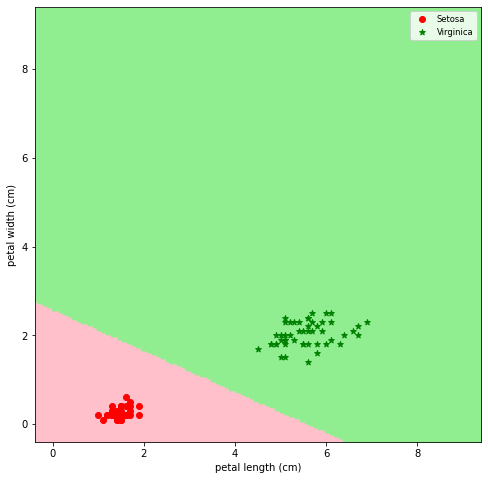

---------------------------------------------------------------------------------------------------- 

Case: 29
--------

Classes
1 Versicolor
2 Virginica

Features
0 sepal length (cm)
1 sepal width (cm)

Accuracy of SGDClassifier model is 74.0 %


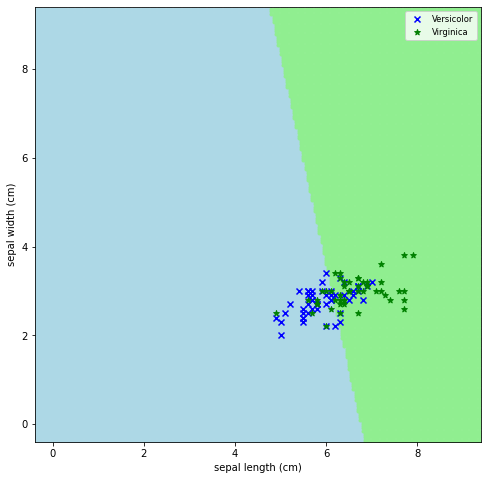

---------------------------------------------------------------------------------------------------- 

Case: 30
--------

Classes
1 Versicolor
2 Virginica

Features
0 sepal length (cm)
2 petal length (cm)

Accuracy of SGDClassifier model is 92.0 %


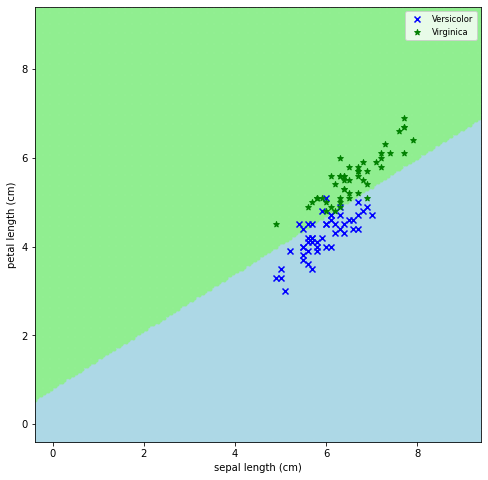

---------------------------------------------------------------------------------------------------- 

Case: 31
--------

Classes
1 Versicolor
2 Virginica

Features
0 sepal length (cm)
3 petal width (cm)

Accuracy of SGDClassifier model is 63.0 %


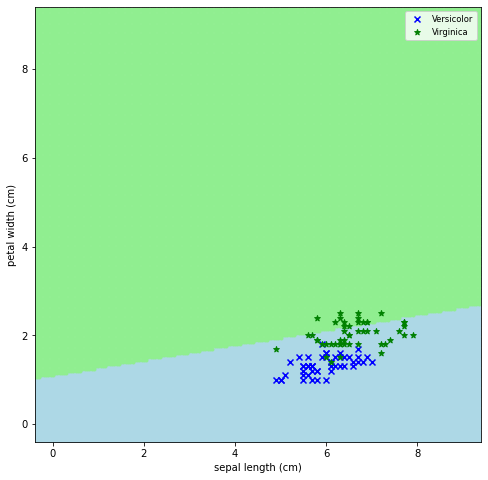

---------------------------------------------------------------------------------------------------- 

Case: 32
--------

Classes
1 Versicolor
2 Virginica

Features
1 sepal width (cm)
2 petal length (cm)

Accuracy of SGDClassifier model is 91.0 %


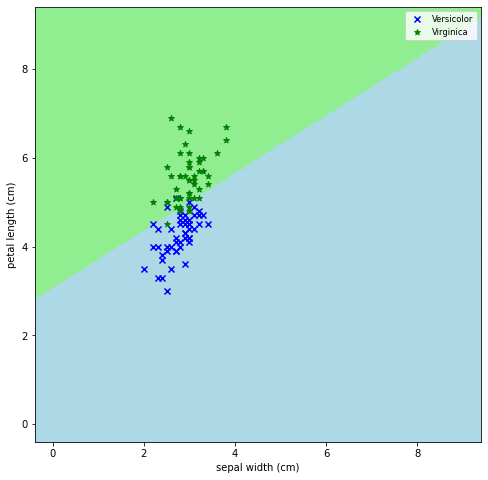

---------------------------------------------------------------------------------------------------- 

Case: 33
--------

Classes
1 Versicolor
2 Virginica

Features
1 sepal width (cm)
3 petal width (cm)

Accuracy of SGDClassifier model is 87.0 %


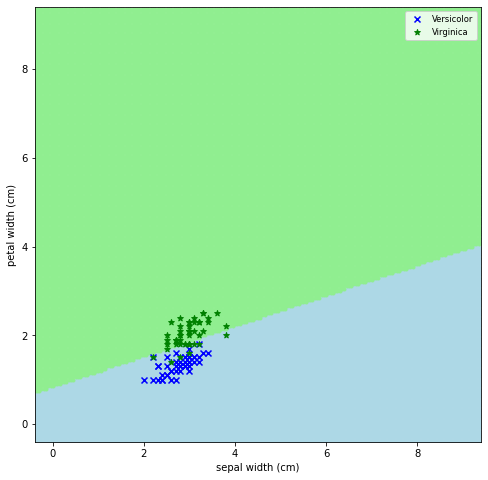

---------------------------------------------------------------------------------------------------- 

Case: 34
--------

Classes
1 Versicolor
2 Virginica

Features
2 petal length (cm)
3 petal width (cm)

Accuracy of SGDClassifier model is 90.0 %


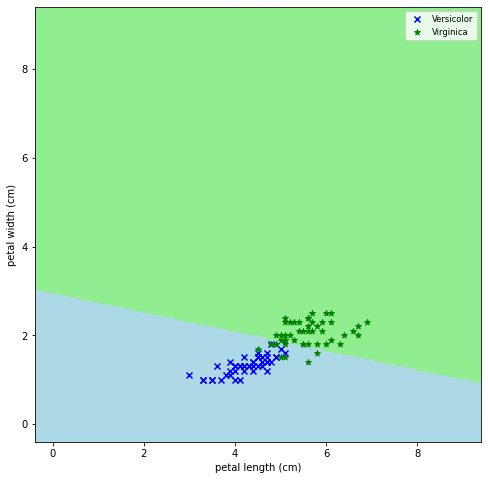

---------------------------------------------------------------------------------------------------- 



In [12]:
for classes in two_classes:
    for feature in two_feature:
        print('Case:', total_cases)
        print('--------')
        XX,YY = build_XX_YY_from_class_and_feature(classes,feature)
        clf = fit_model(XX, YY, tol=1e-4, random_state=0)
        plot_feature_classes(XX, YY, cdx=classes, fdx=feature, clf=clf)
        total_cases +=1
        print('-'*100,'\n')

### Selecting 2 Features and 3 classes 

Case: 35
--------

Classes
0 Setosa
1 Versicolor
2 Virginica

Features
0 sepal length (cm)
1 sepal width (cm)

Accuracy of SGDClassifier model is 77.33333333333333 %


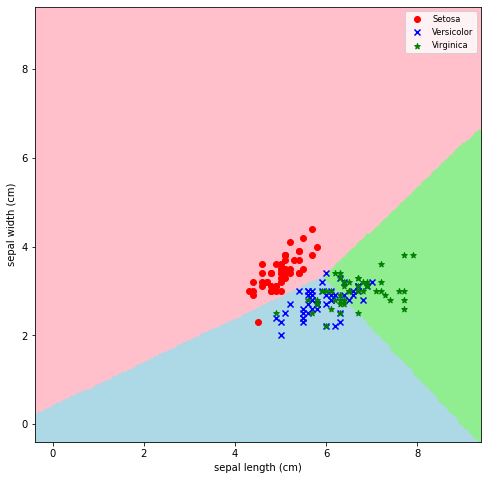

---------------------------------------------------------------------------------------------------- 

Case: 36
--------

Classes
0 Setosa
1 Versicolor
2 Virginica

Features
0 sepal length (cm)
2 petal length (cm)

Accuracy of SGDClassifier model is 87.33333333333333 %


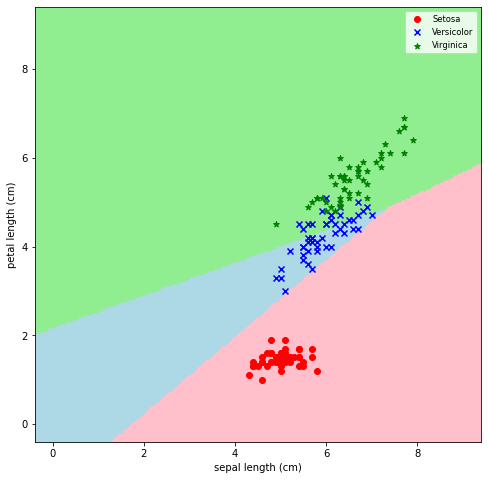

---------------------------------------------------------------------------------------------------- 

Case: 37
--------

Classes
0 Setosa
1 Versicolor
2 Virginica

Features
0 sepal length (cm)
3 petal width (cm)

Accuracy of SGDClassifier model is 94.0 %


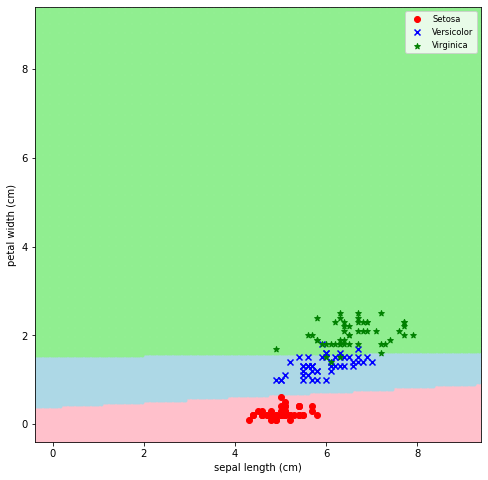

---------------------------------------------------------------------------------------------------- 

Case: 38
--------

Classes
0 Setosa
1 Versicolor
2 Virginica

Features
1 sepal width (cm)
2 petal length (cm)

Accuracy of SGDClassifier model is 88.66666666666667 %


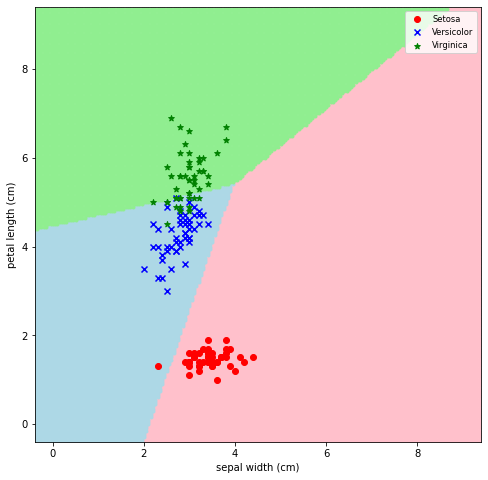

---------------------------------------------------------------------------------------------------- 

Case: 39
--------

Classes
0 Setosa
1 Versicolor
2 Virginica

Features
1 sepal width (cm)
3 petal width (cm)

Accuracy of SGDClassifier model is 89.33333333333333 %


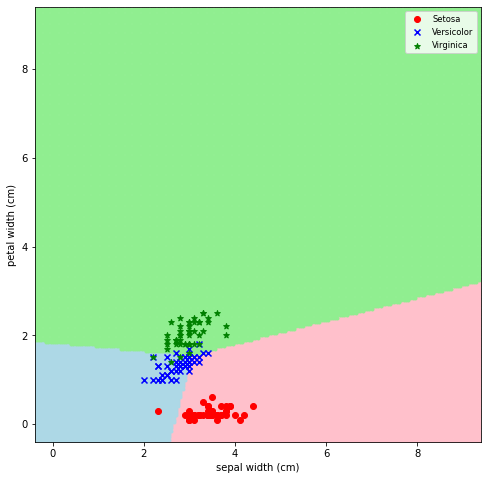

---------------------------------------------------------------------------------------------------- 

Case: 40
--------

Classes
0 Setosa
1 Versicolor
2 Virginica

Features
2 petal length (cm)
3 petal width (cm)

Accuracy of SGDClassifier model is 96.0 %


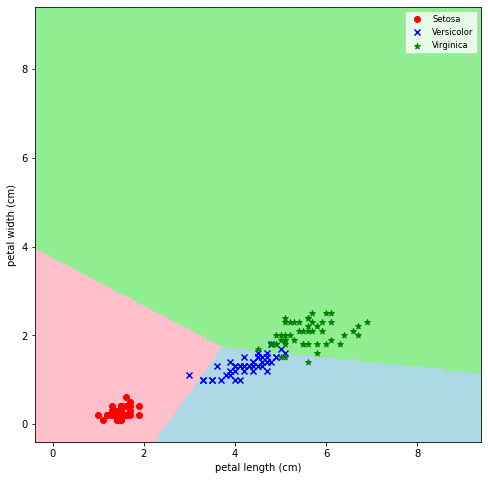

---------------------------------------------------------------------------------------------------- 



In [13]:
for classes in three_classes:
    for feature in two_feature:
        print('Case:', total_cases)
        print('--------')
        XX,YY = build_XX_YY_from_class_and_feature(classes,feature)
        clf = fit_model(XX, YY, tol=1e-4, random_state=0)
        plot_feature_classes(XX, YY, cdx=classes, fdx=feature, clf=clf)
        total_cases +=1
        print('-'*100, '\n')

### Selecting 3 Features and 2 classes

Case: 41
--------

Classes
0 Setosa
1 Versicolor

Features
0 sepal length (cm)
1 sepal width (cm)
2 petal length (cm)

Accuracy of SGDClassifier model is 100.0 %


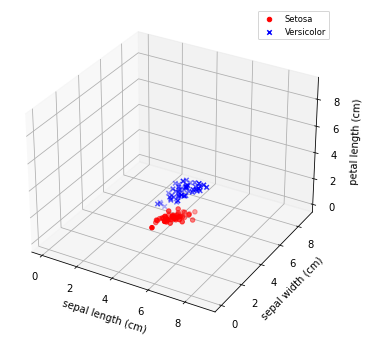

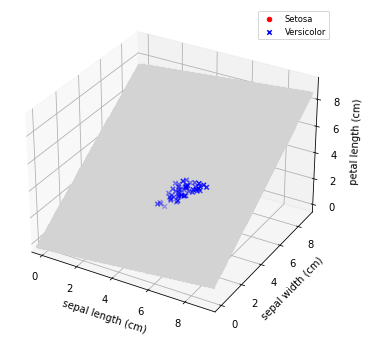

---------------------------------------------------------------------------------------------------- 

Case: 42
--------

Classes
0 Setosa
1 Versicolor

Features
0 sepal length (cm)
1 sepal width (cm)
3 petal width (cm)

Accuracy of SGDClassifier model is 100.0 %


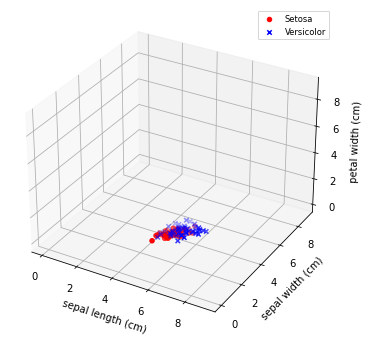

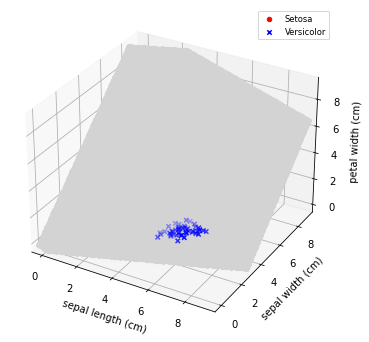

---------------------------------------------------------------------------------------------------- 

Case: 43
--------

Classes
0 Setosa
1 Versicolor

Features
0 sepal length (cm)
2 petal length (cm)
3 petal width (cm)

Accuracy of SGDClassifier model is 100.0 %


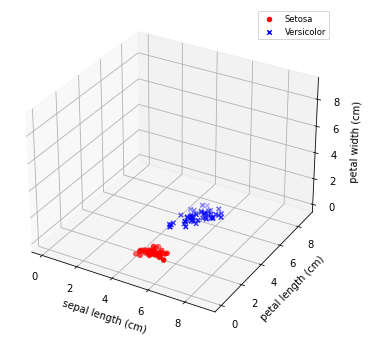

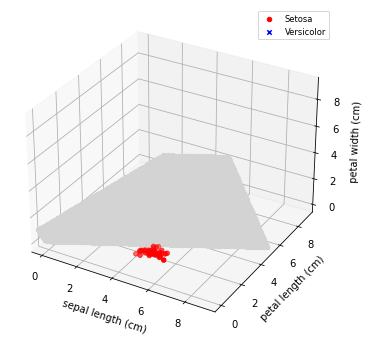

---------------------------------------------------------------------------------------------------- 

Case: 44
--------

Classes
0 Setosa
1 Versicolor

Features
1 sepal width (cm)
2 petal length (cm)
3 petal width (cm)

Accuracy of SGDClassifier model is 100.0 %


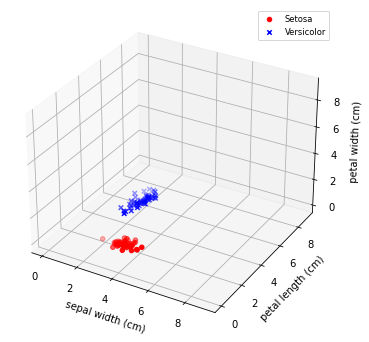

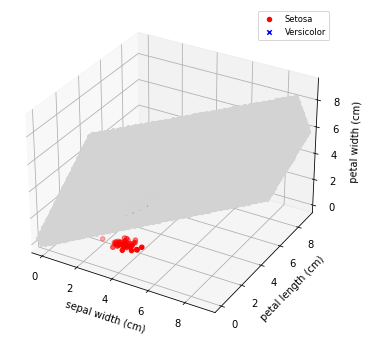

---------------------------------------------------------------------------------------------------- 

Case: 45
--------

Classes
0 Setosa
2 Virginica

Features
0 sepal length (cm)
1 sepal width (cm)
2 petal length (cm)

Accuracy of SGDClassifier model is 100.0 %


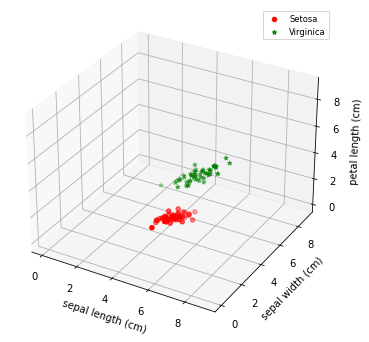

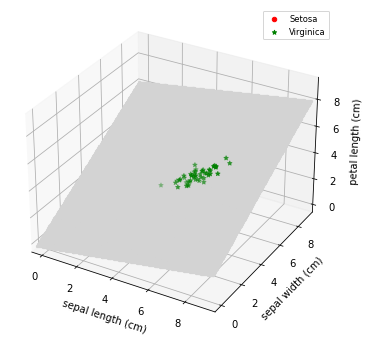

---------------------------------------------------------------------------------------------------- 

Case: 46
--------

Classes
0 Setosa
2 Virginica

Features
0 sepal length (cm)
1 sepal width (cm)
3 petal width (cm)

Accuracy of SGDClassifier model is 100.0 %


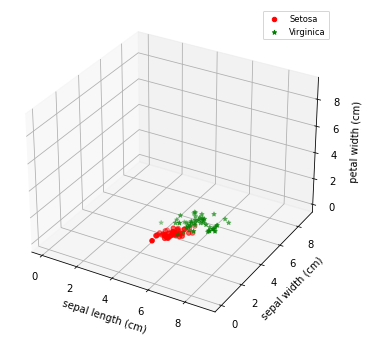

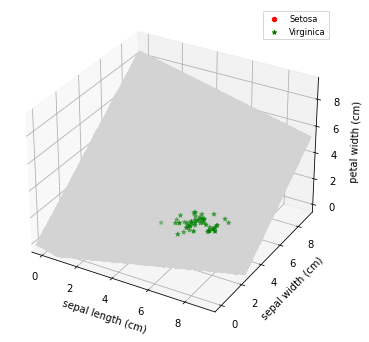

---------------------------------------------------------------------------------------------------- 

Case: 47
--------

Classes
0 Setosa
2 Virginica

Features
0 sepal length (cm)
2 petal length (cm)
3 petal width (cm)

Accuracy of SGDClassifier model is 100.0 %


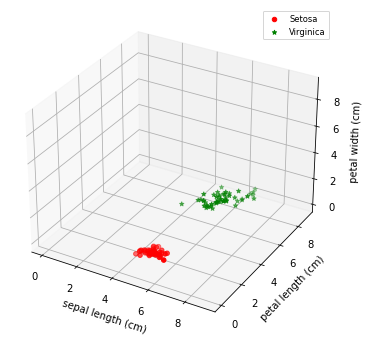

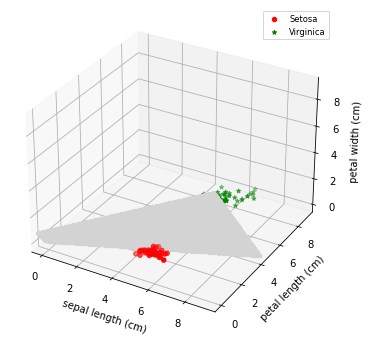

---------------------------------------------------------------------------------------------------- 

Case: 48
--------

Classes
0 Setosa
2 Virginica

Features
1 sepal width (cm)
2 petal length (cm)
3 petal width (cm)

Accuracy of SGDClassifier model is 100.0 %


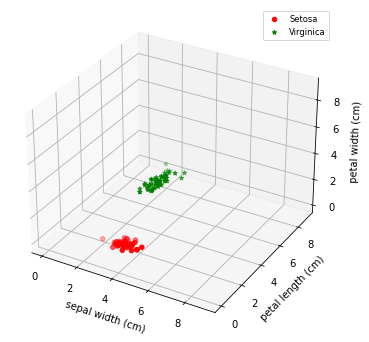

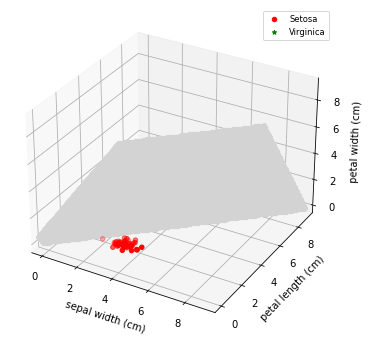

---------------------------------------------------------------------------------------------------- 

Case: 49
--------

Classes
1 Versicolor
2 Virginica

Features
0 sepal length (cm)
1 sepal width (cm)
2 petal length (cm)

Accuracy of SGDClassifier model is 89.0 %


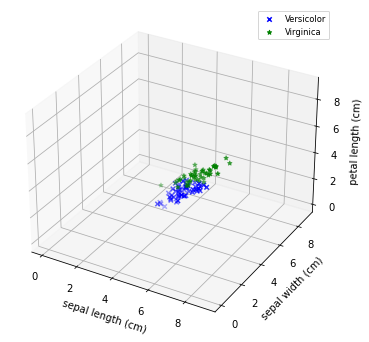

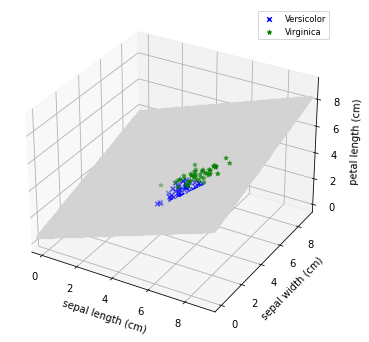

---------------------------------------------------------------------------------------------------- 

Case: 50
--------

Classes
1 Versicolor
2 Virginica

Features
0 sepal length (cm)
1 sepal width (cm)
3 petal width (cm)

Accuracy of SGDClassifier model is 92.0 %


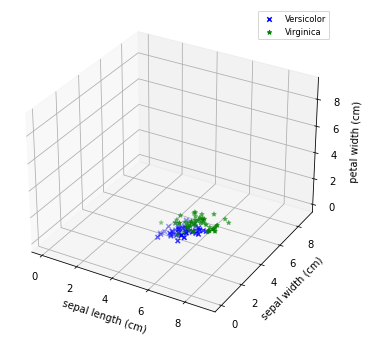

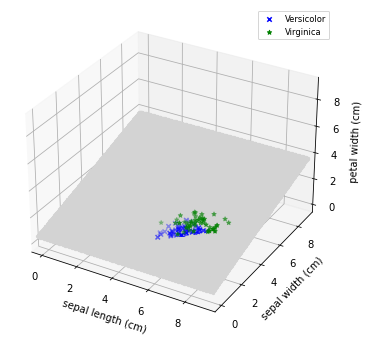

---------------------------------------------------------------------------------------------------- 

Case: 51
--------

Classes
1 Versicolor
2 Virginica

Features
0 sepal length (cm)
2 petal length (cm)
3 petal width (cm)

Accuracy of SGDClassifier model is 96.0 %


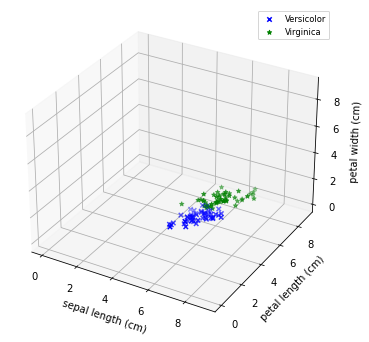

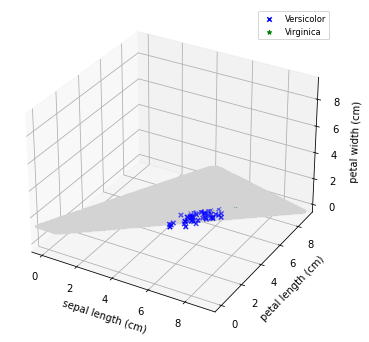

---------------------------------------------------------------------------------------------------- 

Case: 52
--------

Classes
1 Versicolor
2 Virginica

Features
1 sepal width (cm)
2 petal length (cm)
3 petal width (cm)

Accuracy of SGDClassifier model is 66.0 %


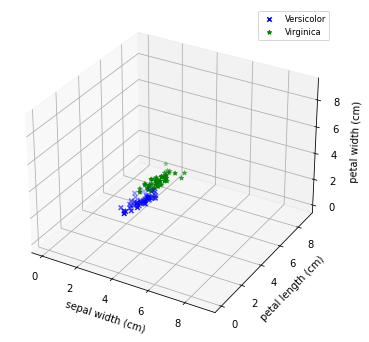

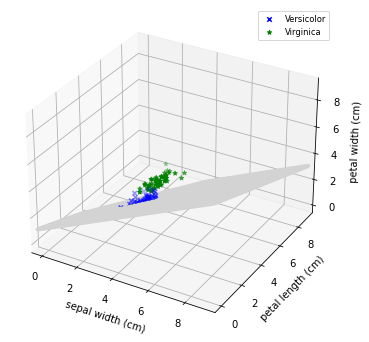

---------------------------------------------------------------------------------------------------- 



In [14]:
for classes in two_classes:
    for feature in three_feature:
        print('Case:', total_cases)
        print('--------')
        XX,YY = build_XX_YY_from_class_and_feature(classes,feature)
        clf = fit_model(XX, YY, tol=1e-4, random_state=0, loss='squared_hinge')
        plot_feature_classes(XX, YY, cdx=classes, fdx=feature, clf=clf)
        total_cases +=1
        print('-'*100, '\n')

### Selecting  3 Feature and 3 classes

Case: 53
--------

Classes
0 Setosa
1 Versicolor
2 Virginica

Features
0 sepal length (cm)
1 sepal width (cm)
2 petal length (cm)

Accuracy of SGDClassifier model is 71.33333333333334 %


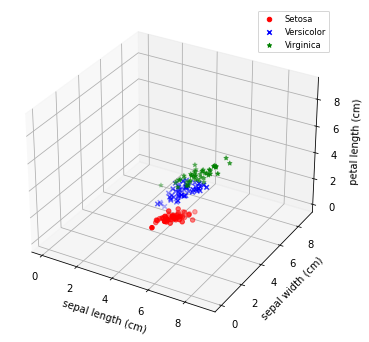

---------------------------------------------------------------------------------------------------- 

Case: 54
--------

Classes
0 Setosa
1 Versicolor
2 Virginica

Features
0 sepal length (cm)
1 sepal width (cm)
3 petal width (cm)

Accuracy of SGDClassifier model is 91.33333333333333 %


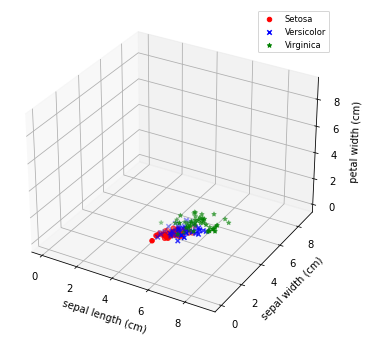

---------------------------------------------------------------------------------------------------- 

Case: 55
--------

Classes
0 Setosa
1 Versicolor
2 Virginica

Features
0 sepal length (cm)
2 petal length (cm)
3 petal width (cm)

Accuracy of SGDClassifier model is 93.33333333333333 %


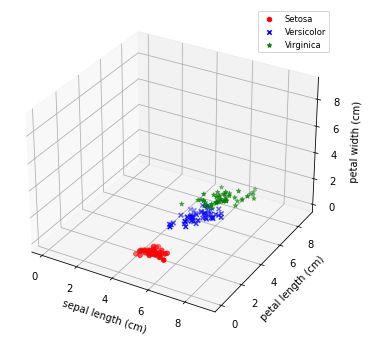

---------------------------------------------------------------------------------------------------- 

Case: 56
--------

Classes
0 Setosa
1 Versicolor
2 Virginica

Features
1 sepal width (cm)
2 petal length (cm)
3 petal width (cm)

Accuracy of SGDClassifier model is 83.33333333333334 %


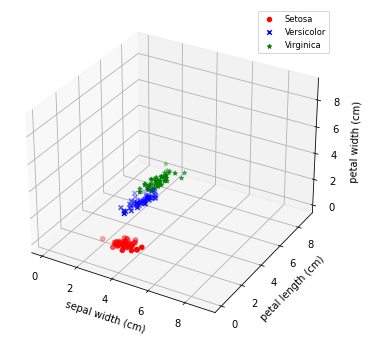

---------------------------------------------------------------------------------------------------- 



In [15]:
for classes in three_classes:
    for feature in three_feature:
        print('Case:', total_cases)
        print('--------')
        XX,YY = build_XX_YY_from_class_and_feature(classes,feature)
        clf = fit_model(XX, YY, tol=1e-4, loss='squared_hinge')
        plot_feature_classes(XX, YY, cdx=classes, fdx=feature, clf=clf)
        total_cases +=1
        print('-'*100,'\n')

### Selecting 4 features and 2 classes 

In [16]:
for classes in two_classes:
    for feature in four_feature:
        print('Case:', total_cases)
        print('--------')
        XX,YY = build_XX_YY_from_class_and_feature(classes,feature)
        clf = fit_model(XX, YY, tol=1e-4, random_state=0, loss='perceptron')
        plot_feature_classes(XX, YY, cdx=classes, fdx=feature, clf=clf)
        total_cases +=1
        print('-'*100, '\n')

Case: 57
--------

Classes
0 Setosa
1 Versicolor

Features
0 sepal length (cm)
1 sepal width (cm)
2 petal length (cm)
3 petal width (cm)

Accuracy of SGDClassifier model is 100.0 %
---------------------------------------------------------------------------------------------------- 

Case: 58
--------

Classes
0 Setosa
2 Virginica

Features
0 sepal length (cm)
1 sepal width (cm)
2 petal length (cm)
3 petal width (cm)

Accuracy of SGDClassifier model is 100.0 %
---------------------------------------------------------------------------------------------------- 

Case: 59
--------

Classes
1 Versicolor
2 Virginica

Features
0 sepal length (cm)
1 sepal width (cm)
2 petal length (cm)
3 petal width (cm)

Accuracy of SGDClassifier model is 83.0 %
---------------------------------------------------------------------------------------------------- 



### Selecting 4 features and 3 classes 

In [17]:
for classes in three_classes:
    for feature in four_feature:
        print('Case:', total_cases)
        print('--------')
        XX,YY = build_XX_YY_from_class_and_feature(classes,feature)
        clf = fit_model(XX, YY, tol=1e-4, random_state=0, loss='perceptron')
        plot_feature_classes(XX, YY, cdx=classes, fdx=feature, clf=clf)
        total_cases +=1
        print('-'*100,'\n')

Case: 60
--------

Classes
0 Setosa
1 Versicolor
2 Virginica

Features
0 sepal length (cm)
1 sepal width (cm)
2 petal length (cm)
3 petal width (cm)

Accuracy of SGDClassifier model is 91.33333333333333 %
---------------------------------------------------------------------------------------------------- 



<br>

## <center> Results </center>

Lets present above information in the table for analysis. <br>
**For selecting 1 Feature and 2 classes:** <br>

Classes/Features| Sepal Length | Sepal Width | Petal Length  | Petal Width 
--------|------------|-----------|-------------|-----------
Setosa/Versicolor|86|83|100|100
Setosa/Virginica|95|61|100|100
Versicolor/Virginica|56.99|60|93|94

<center>Table 1: Selecting 1 Feature and 2 classes  </center>


**For selecting 1 Feature and 3 classes:** 

Classes/Features| Sepal Length | Sepal Width | Petal Length  | Petal Width
----------|--------------|-------------|---------------|-------------
Setosa/Versicolor/Virginica|67.33|54|70.67|94.67

<center>Table 2: Selecting 1 Feature and 3 classes  </center>

**For selecting 2 Features and 2 classes:** 

Classes/Features | Sepal Length +  Sepal Width | Sepal Length + Petal Length  | Sepal Length + Petal Width | Sepal Width + Petal Length | Sepal Width + Petal Width | Petal Length + Petal Width
----|------|------|--------|-------------|---------------|-------------
Setosa/Versicolor|99|100|100|100|100|100
Setosa/Virginica|99|100|100|100|100|100
Versicolor/Virginica|74|92|63|91|87|90

<center>Table 3: Selecting 2 Features and 2 classes  </center>

**For selecting 2 Features and 3 classes:**

Classes/Features | Sepal Length +  Sepal Width | Sepal Length + Petal Length  | Sepal Length + Petal Width | Sepal Width + Petal Length | Sepal Width + Petal Width | Petal Length + Petal Width
----|------|------|--------|-------------|---------------|-------------
Setosa/Versicolor/Virginica|77.33|87.33|94|86.67|89.33|96

<center>Table 4: Selecting 2 Features and 3 classes  </center>

**For selecting 3 Features and 2 classes:**

Classes/Features | Sepal Length +  Sepal Width  + Petal Length  | Sepal Length + Sepal Width  + Petal Width | Sepal Length + Petal Length + Petal Width | Sepal Width + Petal Length + Petal Width
----|------|---------------|-------------|---------------------------
Setosa/Versicolor|100|100|100|100
Setosa/Virginica|100|100|100|100
Versicolor/Virginica|89|92|96|66

<center>Table 5: Selecting 3 Features and 2 classes  </center>

**For selecting 3 Features and 3 classes:**

Classes/Features | Sepal Length +  Sepal Width  + Petal Length  | Sepal Length + Sepal Width  + Petal Width | Sepal Length + Petal Length + Petal Width | Sepal Width + Petal Length + Petal Width
----|------|---------------|-------------|---------------------------
Setosa/Versicolor/Virginica|71.33|91.33|93.33|83.33

<center>Table 6: Selecting 3 Feature and 3 classes  </center>

**For selecting 4 Features and 2 classes:**

Classes/Features | Sepal Length +  Sepal Width  + Petal Length  + Petal Width 
----------------|---------------------------
Setosa/Versicolor|100
Setosa/Virginica|100
Versicolor/Virginica|83

<center>Table 7: Selecting 4 Feature and 2 classes  </center>

**For selecting 4 Features and 3 classes:**

Classes/Features | Sepal Length +  Sepal Width  + Petal Length  + Petal Width 
----------------|---------------------------
Setosa/Versicolor/Virginica|91.33

<center>Table 8: Selecting 4 Features and 3 classes  </center>

<Br>

## <center> Observation/Discussion </center> 

When we are selecting **1 feature with 2 classes**, we got the lowest accuracy of 56.99% for classes of Versicolor and Virginica with feature Sepal Length. Also, Second lowest is 60% with same classes of Versicolor and Virginica but feature is Sepal Width. We did get 100% accuracy for four cases, they are: classes: Setosa and Versicolor with feature Petal Length, as well as with Petal Width. classes:Setosa and Virginica with feature Petal Length, as well as with Petal Width. The loss function for these cases is used as log, the tolerance is 1e-4, , epsilon is 0.01. The full scenario is presented in table 1 of Result section above.

When we are selecting **1 Feature and 3 classes**, we got the lowest accuracy of 54% for class Setosa, Versicolor and Virginica with feature as Sepal Width. we get the highest accuracy of 94.67% for feature of Petal Width. The loss function for these cases is used as log, the tolerance is 1e-4, , epsilon is 0.01. The full scenario is presented in table 2 of the reasult section above.

When we are selecting  **2 features with 2 classes**, the class with Versicolor and Virginica combination gives all the lowest accuracy, but when we pair them individually with setosa, each of the feature gave 99% or 100% accuracy. This reasults gave as good analysis about the setosa class, which is leading us to have more accuracy in our result. Here we are using the default loss function to be hindge, with the tolarence to be 1e-4, epsilon is set as 0.1. The overall scenario of accuracy is shown in the table 3 above. 

When we selecting **2 features with 3 classes**, we got the lowest accuracy of 77.33 for class Setosa, Versicolor,and Virginica with feature Sepal Length and Sepal Width. We also got the highest accuracy of 96% with features Petal length and Petal Width.Here we are using the default loss function to be hindge, with the tolarence to be 1e-4, epsilon is set as 0.1. The overall scenario of accuracy is shown in the table 4 above. 

When we are selecting **3 features with 2 classes**, we got the lowest accuracy when Versicolor and Virginica classes are selected together for any three features. But, when Versicolor and Virginica are combined individually with setosa, the result accuracy rises to 100% for all the cases with 3 features. For these cases we use loss function of squared_hinge which works almost similar to default loss function. For the detailed scenario of the accuracy solution is shown above in table 5. 

When  we are selecting for **3 features with 3 classes**, we got the lowest accuracy of 71.33% of class Setosa, Versicolor, and Virginica with features Sepal Length, Sepal Width, and Petal Length. We also got highest accuracy 93.33% of all the three class with three feature: Sepal Length, Petal Length, and Petal Width. For these cases we use loss function of squared_hinge which works almost similar to default loss function. For the detailed scenario of the accuracy solution is shown above in table 6. 


When  we are selecting for **4 features with 2 classes**, we got the lowest accuracy of 83% of class Versicolor, and Virginica with all four features. And, we got 100% accuracy when setosa class is linked with individual Versicolor, and Virginica we use perceptron loss function in our model. The detailed accuracy table is shouwn above in table 7. 


When  we are selecting for **4 features with 3 classes**, we got the accuracy of 91.33%. we use perceptron loss function in our model. The accuracy table is shouwn above in table 8. 

**Finally**, after calculating the accuracy of all the 60 cases with four different loss function, we found that in most of the cases we got our accuracy high. In few cases, we didn't have perfect accuray, but they were not very low accuracy. The loss functions we used in our model are log loss, perceptron loss, Hinge loss, and squared hinge loss. On using different loss function in different cases, the accuracy changes slighly, but not all the accuracy are changed. One thing I noticed is that if we pass multiple loss function to the combination and check their accuray, it will be just increase in one of the case and lower in another. The loss functions used in our cases works satisfactory result for all the 60 cases.  






<br>

**<center>The End</center>**